Графы данных для двух кластеров в пространстве.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from utils import quality_of_partition, gen_data_graphs, w_label_prop

GRAPH_NAMES = ['nn', 'mst', 'rng', 'gabriel', 'triangulation']

def true_partition(n, as_color=True):
    if as_color:
        return ['r'] * (n // 2) + ['g'] * ((n + 1) // 2)
    else:
        return [0] * (n // 2) + [1] * ((n + 1) // 2)
    
def plot_graphs(graphs, run_detection=False):
    n = len(data)
    if run_detection:
        colors = []
        for graph in graphs:
            partition, _ = w_label_prop(graph, min_delta=5)
            dct = dict(zip(set(partition), range(len(set(partition)))))
            colors.append([dct[i] for i in partition])
    else:
        colors = [true_partition(graphs[0].number_of_nodes(), as_color=True) for g in graphs]
    for graph, color, name in zip(graphs, colors, GRAPH_NAMES):
        plt.figure(figsize=(8, 4))
        plt.title(name)
        nx.draw(graph, node_color=color)

"Настоящие" сообщества

0


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


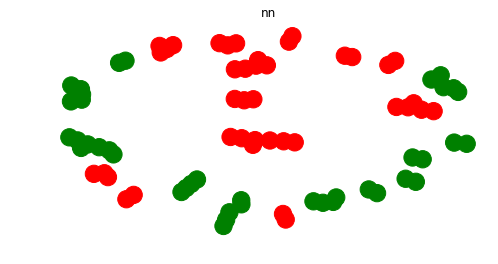

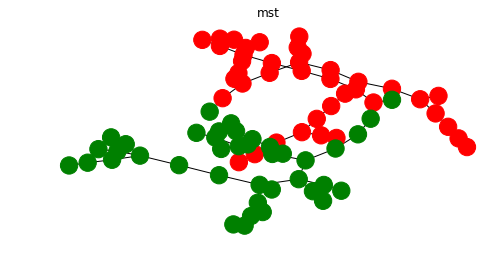

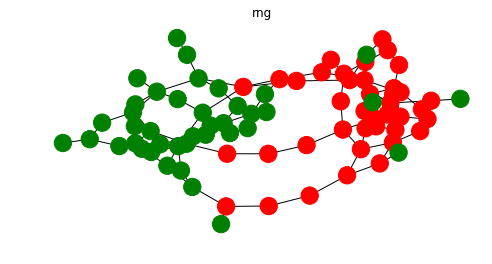

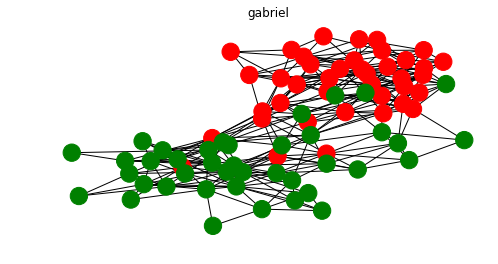

In [2]:
data, graphs = gen_data_graphs(80, 4)
plot_graphs(graphs)

Найденные сообщества.

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


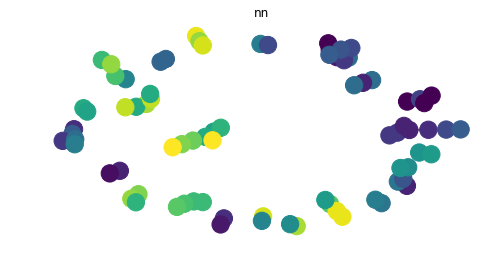

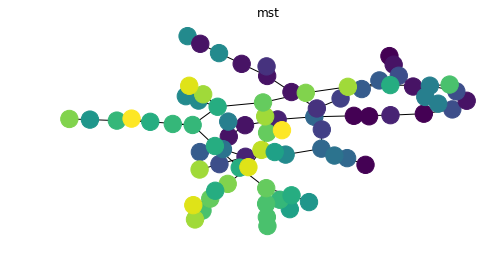

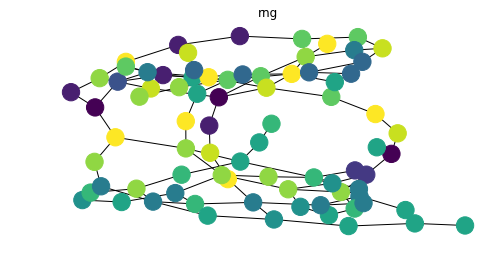

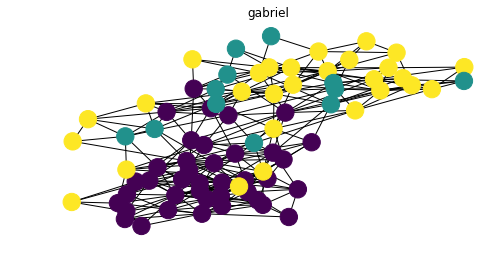

In [3]:
plot_graphs(graphs, True)

Качество community_detection

In [4]:
for graph, name in zip(graphs, GRAPH_NAMES):
    print(name, quality_of_partition(true_partition(graph.number_of_nodes()),
                                     w_label_prop(graph, min_delta=5)[0]))

nn 0.1125
mst 0.2
rng 0.225
gabriel 0.825


In [5]:
from utils import label_propagation

for graph, name in zip(graphs, GRAPH_NAMES):
    print(name, quality_of_partition(true_partition(graph.number_of_nodes()),
                                     label_propagation(graph, min_delta=5)[0]))

nn 0.025
mst 0.025
rng 0.025
gabriel 0.7375
